In [ ]:
# https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data
! pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [62]:
import string
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [61]:
stop_words = set(stopwords.words('english'))

df['processed_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word not in string.punctuation]))

df.head()


,Unnamed: 0,label,text,label_num,processed_text
0,605,ham,subject: enron methanol ; meter # : 988291 fol...,0,subject: enron methanol meter 988291 follow no...
1,2349,ham,"subject: hpl nom january 9 , 2001 ( see attach...",0,subject: hpl nom january 9 2001 see attached f...
2,3624,ham,"subject: neon retreat ho ho ho , ' around wond...",0,subject: neon retreat ho ho ho around wonderfu...
3,4685,spam,"subject: photoshop , windows , office . cheap ...",1,subject: photoshop windows office cheap main t...
4,2030,ham,subject: : indian springs deal book teco pvr r...,0,subject: indian springs deal book teco pvr rev...


In [64]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y = df['label'].map({'spam': 1, 'ham': 0}).values


In [66]:
# Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Huấn luyện Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9864734299516909
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



Accuracy: 0.9516908212560387
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       742
           1       0.90      0.93      0.92       293

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



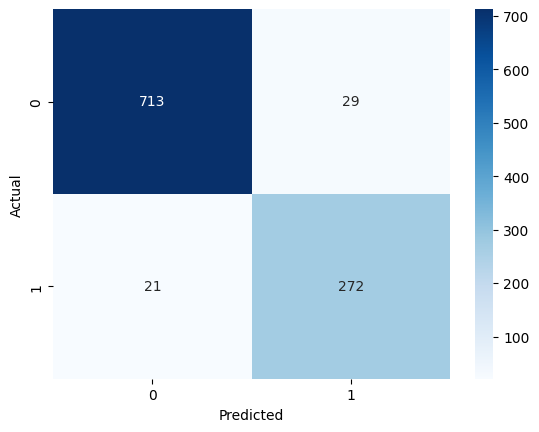

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

# Huấn luyện Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Vẽ ma trận nhầm lẫn cho Naive Bayes
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [71]:
from sklearn.svm import SVC

# Huấn luyện SVM
svm = SVC()
svm.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9922705314009662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.98      0.99      0.99       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

